In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

### 집값 예측

In [17]:
df = pd.read_csv("./res/연습문제데이터(집값예측)/train.csv")
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [19]:
# 컬럼 이름을 참조해서 데이터의 유니크한 값이 몇개 있는지 확인
for column in df:
    print(column, df[column].nunique()) 

id 15035
date 365
price 3263
bedrooms 11
bathrooms 29
sqft_living 863
sqft_lot 7678
floors 6
waterfront 2
view 5
condition 5
grade 12
sqft_above 789
sqft_basement 271
yr_built 116
yr_renovated 65
zipcode 70
lat 4692
long 716
sqft_living15 682
sqft_lot15 6958


C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


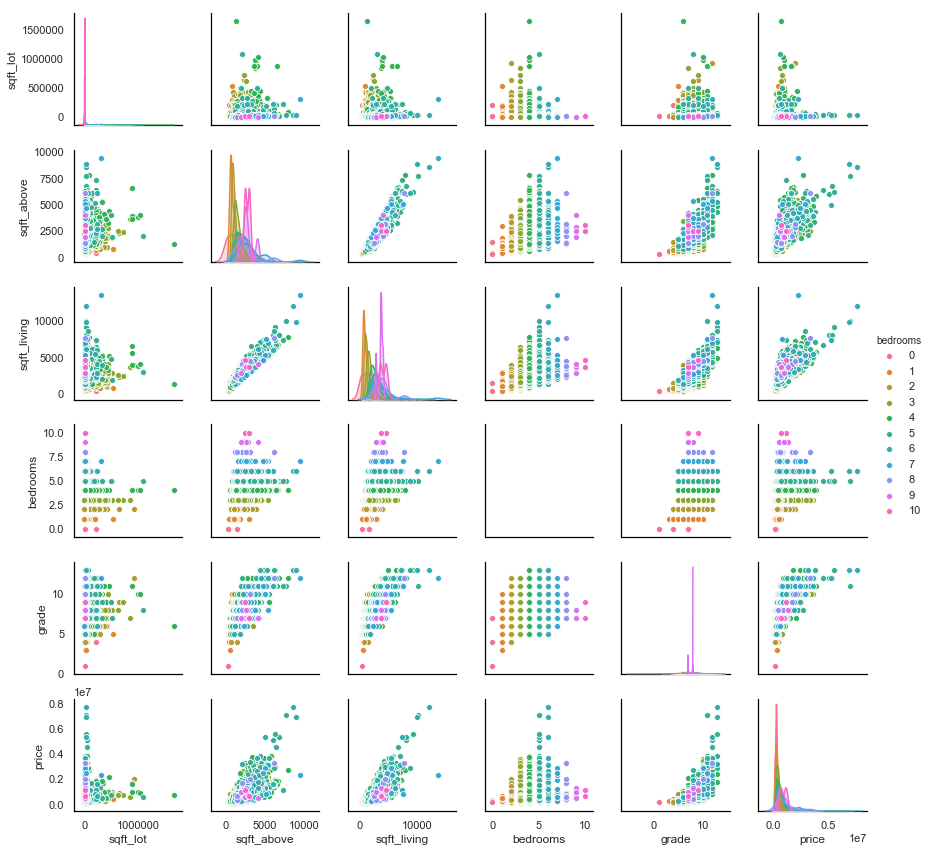

In [30]:
cols = ["sqft_lot", "sqft_above", "sqft_living", "bedrooms", "grade", "price"]
sns.plotting_context(font_scale=1.5)
sns.pairplot(df[cols], hue="bedrooms", size=2) # bedroom 개수에 따른 각 변수끼리의 상관관계
# https://stackoverflow.com/questions/51400076/change-seaborn-pair-plot-figure-size

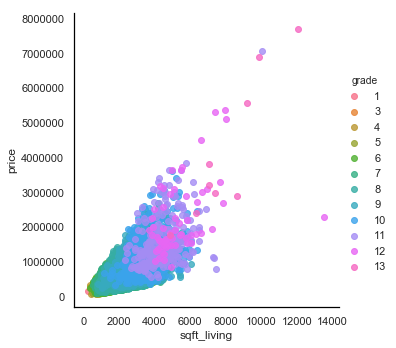

In [33]:
sns.lmplot(x="sqft_living",y="price", hue="grade", data=df, fit_reg=False) # 회귀선 제거

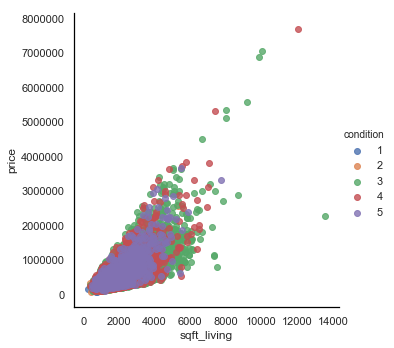

In [22]:
sns.lmplot(x="sqft_living",y="price", hue="condition", data=df, fit_reg=False)

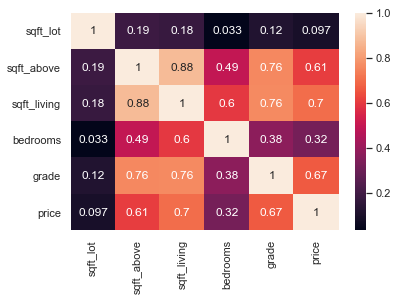

In [23]:
# 상관관계는 히트맵으로 보는게 편함
sns.heatmap(df[cols].corr(), annot=True)

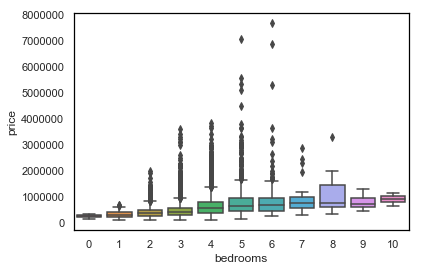

In [24]:
# boxplot은 방 개수에 따른 가격에 대한 
# 최소값, 중앙값, 최대값, 이상치가 어느정도 있는지를 확인하기 위한 용도
# 변수를 바꿔서 그려보기 
sns.boxplot(x=df["bedrooms"], y=df["price"])

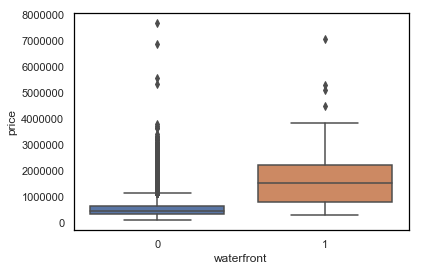

In [22]:
sns.boxplot(x=df["waterfront"], y=df["price"])

[(0, 250000)]

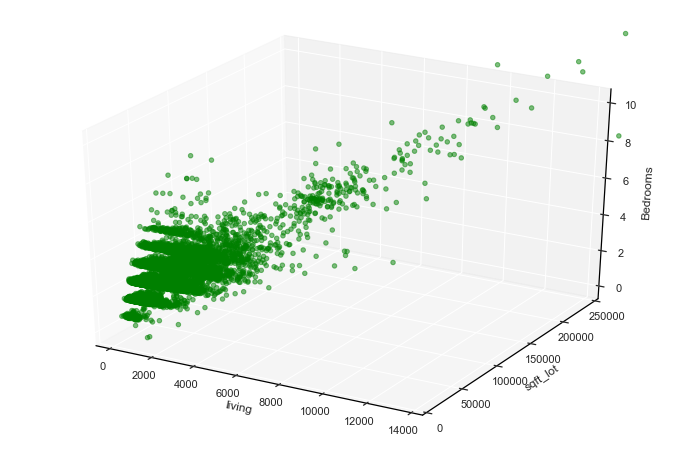

In [25]:
# 방개수, 면적, 집크기 → 3차원 그래프로 시각화 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8)) # figure가 가장 큰 단위이고 적어도 한개 이상의 axes로 나눌 수 있음
ax = fig.add_subplot(1,1,1, projection="3d") # 가로 1개, 세로 1개, 첫번째에 그리겠다
ax.scatter(df['sqft_living'], df['sqft_lot'], 
           df['bedrooms'], c='green', alpha=.5)
ax.set(xlabel='living', ylabel='sqft_lot', zlabel='Bedrooms')
ax.set(ylim=[0,250000])

In [26]:
from sklearn.model_selection import train_test_split
train_df1, train_df2 = train_test_split(df, train_size=0.8, random_state=42)
print(df.shape)
print(train_df1.shape)
print(train_df2.shape)

(15035, 21)
(12028, 21)
(3007, 21)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.tree import DecisionTreeRegressor # 결정트리
from sklearn.ensemble import RandomForestRegressor # 랜덤 포레스트

In [40]:
model = LinearRegression()
model.fit(train_df1[['sqft_living']],train_df1[["price"]]) # 데이터가 matrix여서 [[]]로 쓰기
# 모델 작성 끝

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 회귀분석 모델 평가(결정계수, R square)
실제값 - 예측값 = 잔차의 제곱의 합을 최소화 <br>
0 <= 결정계수(설명력) <= 1 <br>
Q : 전체 데이터의 편차 제곱의 합 <br>
Qe: 전체 데이터의 잔차 제곱의 합 <br>
결정계수(R2)=(Q-Qe) / Q <br>
LinearRegression 클래스의 score 함수를 이용해서 결정계수를 얻을 수 있음

In [53]:
score = model.score(train_df2[["sqft_living"]],train_df2[["price"]])
print(format(score,".3f"))

0.484


In [55]:
predicted = model.predict(train_df2[["sqft_living"]])
print(predicted) # test 데이터에 대한 prediction 

[[368244.47878762]
 [493639.69539596]
 [348295.23978175]
 ...
 [305546.87048345]
 [476540.34767664]
 [308396.76177   ]]


In [58]:
print(model.intercept_) # 절편
print(model.coef_) # 기울기

[-53539.43162226]
[[284.98912866]]


In [60]:
# 분류 모델에 대한 평가 (회귀분석 모델에 대한 평가랑 다름)
from sklearn.metrics import confusion_matrix
xtrue = [2,0,2,2,0,1]
xpred = [0,0,2,2,0,2]
confusion_matrix(xtrue, xpred)
# 행 인덱스 자리에 0,1,2 열 인덱스는 0,1,2가 있다고 생각하고 행은 실제값, 열은 예측값을 의미
# (0,0)은 실제가 0인데 0으로 예측한 건수가 2개 있고, (0,1)은 실제가 0인데 1로 예측한 건수가 0개 있다라는 의미
# 따라서 (0,0),(1,1),(2,2)는 예측이 맞은 건수을 의미

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

### 이진분류(Pos/Neg)
ex)불량품 분류기 (불량품:양성, 정상품:음성)  
-TP:불량품을 불량품으로 맞게 예측  
-TN:정삼품을 정상품으로 맞게 예측  
-FP:정상품을 불량품으로 틀리게 예측  
-FN:불량품을 정상품으로 틀리게 예측  

In [61]:
xtrue = [1,0,1,1,0,1]
xpred = [0,0,1,1,0,1]
confusion_matrix(xtrue,xpred)

array([[2, 0],
       [1, 3]], dtype=int64)

[참고](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B0%80%EB%8F%84%EC%99%80_%EC%9E%AC%ED%98%84%EC%9C%A8) <br>
* 정확도 = (TP+TN) / (TP+TN+FP+FN)
* 정밀도 = TP/(TP+FP)
* 재현율 = TP(TP+FN)
* F점수 = 2*정밀도*재현율 / (정밀도+재현율) <br>

In [63]:
model.fit(train_df1[["sqft_living","bedrooms","bathrooms"]], train_df1[["price"]])
score = model.score(train_df2[["sqft_living","bedrooms","bathrooms"]],train_df2[["price"]])
print(format(score,".3f"))

0.496


In [70]:
features = ["sqft_living","bedrooms","bathrooms","sqft_lot","floors","zipcode","view","waterfront","grade","yr_built"]
model.fit(train_df1[["sqft_living","bedrooms","bathrooms","sqft_lot","floors",
                     "zipcode","view","waterfront","grade","yr_built"]], train_df1[["price"]])
score = model.score(train_df2[["sqft_living","bedrooms","bathrooms","sqft_lot","floors",
                     "zipcode","view","waterfront","grade","yr_built"]],train_df2[["price"]])
print(format(score,".3f"))

0.657


In [77]:
# knn 알고리즘 → 예측
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=9)
model.fit(train_df1[features], train_df1['price'])
score = model.score(train_df2[features],train_df2['price'])
print(format(score,'.3f'))

0.501


In [80]:
# desicion tree 알고리즘 → 예측
model = DecisionTreeRegressor(random_state=42)
model.fit(train_df1[features], train_df1['price'])
score = model.score(train_df2[features],train_df2['price'])
print(format(score,'.3f'))
predicted = model.predict(train_df2[features])
print(predicted)

0.577
[208000. 235000. 642000. ... 259000. 530000. 455000.]


In [81]:
# random forest 알고리즘 => 예측
model = RandomForestRegressor(random_state=42, n_estimators=27)
model.fit(train_df1[features], train_df1['price'])
score = model.score(train_df2[features],train_df2['price'])
print(format(score,'.3f'))
predicted = model.predict(train_df2[features])
print(predicted)

0.793
[298496.2962963  276498.14814815 559725.92592593 ... 339377.33333333
 506681.48148148 428766.66666667]


In [84]:
testdf = pd.read_csv("./res/연습문제데이터(집값예측)/test.csv")
predicted = model.predict(testdf[features])
ss = pd.read_csv("./res/연습문제데이터(집값예측)/sample_submission.csv")
ss["price"] = predicted
ss.to_csv("sub_file.csv", index=False)

성능을 올리려면?  
1. 가중치
2. 파생변수
3. 아웃라이어 처리
4. 값 → 구간화(원핫인코딩)
5. 컬럼 값에 대한 표준화/정규화
6. 딥러닝?
7. 앙상블 모델

### 로지스틱 회귀 비용함수 

In [37]:
import tensorflow as tf
xdata=[[1,2],
      [2,3],
      [3,1],
      [4,3],
      [5,3],
      [6,2]]
ydata=[[0],
      [0],
      [0],
      [1],
      [1],
      [1]]

In [38]:
x = tf.placeholder(tf.float32, shape=[None,2]) # numpy에서는 none이 -1
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([2,1]), name="weight")
# 입력 속성 2개, 출력 결과 1개
b = tf.Variable(tf.random_normal([1]), name="bias")
# 출력 결과 1개
# [None,2] [2,1] = [None,1]
#    x       w         y

In [39]:
hf = tf.sigmoid(tf.matmul(x,w) + b)
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [40]:
predicted = tf.cast(hf>0.5, dtype=tf.float32) # 텐서를 새로운 형태로 캐스팅하는데 사용
# hf>0.5 boolean 형태를 float 형태로 변환해서 출력(true:1.0 , false:0)
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))
# 두 값이 같으면 true, 다르면 false 로 나오므로 cast 함수를 써서 인수로 표현

In [42]:
# with : with 구문을 벗어나면 함수가 소멸됨
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _,cv = sess.run([train, cost], feed_dict={x:xdata,y:ydata})
        if step % 200 ==0 :
            print(step, cv) # cost 변화 확인
# for 문을 빠져나오면 최종적으로 업데이트된 w,b를 얻을 수 있음
    hv, pv, av = sess.run([hf,predicted,accuracy], feed_dict={x:xdata,y:ydata})
    print("hf=\n",hv,"\npred=\n",pv, "\nacc=\n",av)

0 3.5654793
200 0.615921
400 0.51048183
600 0.46114627
800 0.4321512
1000 0.4116143
1200 0.3951335
1400 0.38087988
1600 0.36801884
1800 0.35613802
2000 0.34501866
2200 0.3345355
2400 0.32461044
2600 0.31519
2800 0.30623436
3000 0.2977114
3200 0.28959355
3400 0.28185618
3600 0.27447715
3800 0.2674357
4000 0.26071241
4200 0.25428933
4400 0.24814934
4600 0.2422766
4800 0.23665597
5000 0.23127346
5200 0.22611582
5400 0.22117078
5600 0.21642657
5800 0.21187226
6000 0.20749766
6200 0.2032932
6400 0.19924992
6600 0.1953593
6800 0.1916135
7000 0.18800502
7200 0.18452694
7400 0.18117268
7600 0.17793615
7800 0.17481159
8000 0.17179354
8200 0.16887683
8400 0.1660567
8600 0.1633286
8800 0.16068827
9000 0.15813182
9200 0.1556552
9400 0.15325509
9600 0.15092799
9800 0.1486707
10000 0.14648028
hf=
 [[0.02948219]
 [0.15710652]
 [0.29878888]
 [0.7841725 ]
 [0.9413199 ]
 [0.98075587]] 
pred=
 [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
acc=
 1.0


### 당뇨(diabetes) 문제

In [110]:
xy = np.loadtxt("./res/diabetes.csv", delimiter=",")
np.shape(xy)

(759, 9)

In [120]:
xdata = xy[:,0:-1] # 마지막 열을 제외한 열들 추출
ydata = xy[:,[-1]] # 마지막 열 
xdata.shape # (759, 8)
ydata.shape # (759, 1)

(759, 1)

In [121]:
# 그래프 구상
x = tf.placeholder(tf.float32, shape=[None,8])
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([8,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")
hf = tf.sigmoid(tf.matmul(x,w)+b)
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [122]:
predicted = tf.cast(hf>0.5, dtype=tf.float32) # boolean 형태로 출력하지 않고 float으로 출력
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted ,y), dtype=tf.float32))
# 임계치를 어떻게 주느냐에 따라 결과가 달라지므로  임계치를 어떻게 주는지가 매우 중요
# 0.5보다 크면 당뇨병, 0.5보다 작으면 당뇨병이 아니다를 의미
# accuracy를 실행하면 predicted를 실행하는 것으로 역으로 올라가면서 계산

In [127]:
# 그래프 실행
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        cv,_ = sess.run([cost,train], feed_dict={x:xdata,y:ydata})
        if step%200 == 0:
            print(step, cv)
    hv,pv,av = sess.run([hf,predicted,accuracy], feed_dict={x:xdata,y:ydata})    
    print("hf:",hv, "pv:",pv,"av:",av)

0 1.079658
200 0.81855255
400 0.7615838
600 0.73534995
800 0.7150762
1000 0.6969162
1200 0.6801726
1400 0.664669
1600 0.6503188
1800 0.63705176
2000 0.6248013
2200 0.6135026
2400 0.60309315
2600 0.5935117
2800 0.5846993
3000 0.57659936
3200 0.56915736
3400 0.56232166
3600 0.5560432
3800 0.55027604
4000 0.54497683
4200 0.5401058
4400 0.53562546
4600 0.5315018
4800 0.52770346
5000 0.5242017
5200 0.5209702
5400 0.51798546
5600 0.51522565
5800 0.51267123
6000 0.5103044
6200 0.5081091
6400 0.50607073
6600 0.50417614
6800 0.5024134
7000 0.5007714
7200 0.49924067
7400 0.49781206
7600 0.49647748
7800 0.4952297
8000 0.49406183
8200 0.49296775
8400 0.4919422
8600 0.49097967
8800 0.49007583
9000 0.48922628
9200 0.48842707
9400 0.4876748
9600 0.48696598
9800 0.48629782
10000 0.48566732
10200 0.48507217
10400 0.4845097
10600 0.48397794
10800 0.483475
11000 0.48299882
11200 0.48254785
11400 0.4821203
11600 0.4817148
11800 0.48133007
12000 0.48096472
12200 0.4806176
12400 0.4802876
12600 0.47997382
1

 [1.]] av: 0.7720685


1.가중치  
2.파생변수  
3.아웃라이어 처리  
4.값 → 구간화(원핫인코딩)  
5.컬럼 값에 대한 표준화/정규화  
6.딥러닝? <br>
7.앙상블 모델  